Processing windows (Extracting features): 100%|██████████| 4422/4422 [00:05<00:00, 855.41it/s]


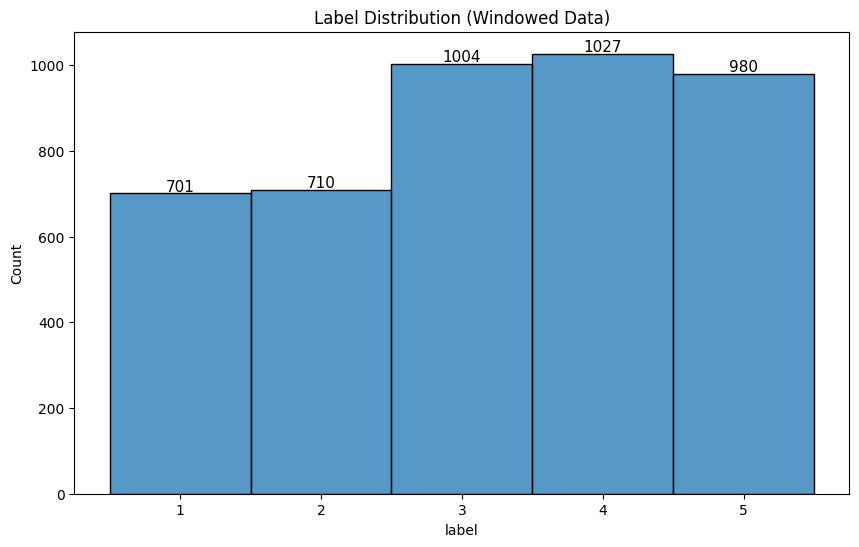

In [8]:
from BoxingRecognition.util import DataUtility

# Load data
df = DataUtility.get_feature_df(DataUtility.get_aggregate_df(drop_unlabeled_data=True,sessions=[1,2,3,4,5,6], shuffle_sequences=False, augment_data=False), window_size=50, overlap_size=25,drop_window_id=True)

In [9]:
from sklearn.model_selection import train_test_split

# Set the random state
rng = 404

# Get features and labels (x and y)
x = df.drop(columns='label')
y = df['label']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=rng)

In [10]:
from sklearn.ensemble import RandomForestClassifier

# Train the model
model = RandomForestClassifier(random_state=rng)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=404)

In [11]:
from BoxingRecognition.util import EvaluationUtility

# Print the classification report
EvaluationUtility.print_model_classification_report(fitted_model=model, x_test=x_test, y_test=y_test)

              precision    recall  f1-score   support

         1.0       0.92      0.90      0.91       195
         2.0       0.92      0.93      0.93       197
         3.0       0.90      0.91      0.91       300
         4.0       0.88      0.87      0.87       303
         5.0       0.99      0.99      0.99       332

    accuracy                           0.92      1327
   macro avg       0.92      0.92      0.92      1327
weighted avg       0.92      0.92      0.92      1327


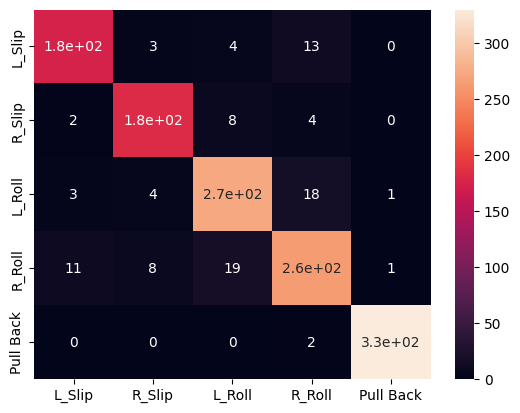

In [12]:
# Print the confusion matrix
EvaluationUtility.plot_confusion_matrix(fitted_model=model, x_test=x_test, y_test=y_test, labels=y.unique())

In [13]:
# Print the feature importances
feature_importances = model.feature_importances_
# Display the feature importances by sorting them in descending order, and printing the top 10
sorted_indices = feature_importances.argsort()[::-1]
for i in range(len(sorted_indices)):
    print(f'{x.columns[sorted_indices[i]]}: {feature_importances[sorted_indices[i]]}')

gyroscope_y_max: 0.1640897006726113
gyroscope_y_std: 0.09948304639604588
accelerometer_x_quantile_10: 0.09121335858795827
gyroscope_y_rms: 0.08970619080447553
accelerometer_x_min: 0.08125980570870585
gyroscope_y_min: 0.06702078548444428
gyroscope_y_var: 0.06421264157424385
accelerometer_x_max: 0.05711229845714005
accelerometer_x_std: 0.053741550220355115
accelerometer_x_abs_max: 0.051300635748296436
accelerometer_x_var: 0.05066827024387586
gyroscope_y_abs_max: 0.04879737311189121
accelerometer_x_rms: 0.042367647196498236
gyroscope_y_quantile_10: 0.03902669579345817


In [14]:
# Train on all data
model.fit(x, y)

# Exporting the model
import joblib
joblib.dump((model, list(x.columns)), 'models/random_forest_model_and_features.pkl')

['models/random_forest_model_and_features.pkl']